In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-powerkwh-produced-by-windmills/dataset/sample_submission.csv
/kaggle/input/predict-the-powerkwh-produced-by-windmills/dataset/train.csv
/kaggle/input/predict-the-powerkwh-produced-by-windmills/dataset/test.csv


# Importing DataSet

In [2]:
train = pd.read_csv('../input/predict-the-powerkwh-produced-by-windmills/dataset/train.csv')
test = pd.read_csv('../input/predict-the-powerkwh-produced-by-windmills/dataset/test.csv')

In [3]:
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [4]:
test.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


# EDA and Data Preprocessing of the DataSet

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    12086 non-null  object 
 1   datetime                       12086 non-null  object 
 2   wind_speed(m/s)                11960 non-null  float64
 3   atmospheric_temperature(°C)    10659 non-null  float64
 4   shaft_temperature(°C)          12085 non-null  float64
 5   blades_angle(°)                11980 non-null  float64
 6   gearbox_temperature(°C)        12085 non-null  float64
 7   engine_temperature(°C)         12081 non-null  float64
 8   motor_torque(N-m)              12075 non-null  float64
 9   generator_temperature(°C)      12081 non-null  float64
 10  atmospheric_pressure(Pascal)   10935 non-null  float64
 11  area_temperature(°C)           12085 non-null  float64
 12  windmill_body_temperature(°C)  11160 non-null 

In [7]:
train.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [8]:
test.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
count,11960.000000,10659.000000,12085.000000,11980.000000,12085.000000,12081.000000,12075.000000,12081.000000,1.093500e+04,12085.000000,11160.000000,9926.000000,12086.000000,11805.000000,9972.000000,12086.000000,11831.000000
mean,69.381862,0.687445,39.936571,-9.218509,40.318639,42.604738,1717.343991,65.237894,5.428332e+04,32.796168,20.906469,308.376140,1581.289398,26.566581,2.201328,0.397527,25.963743
std,76.119487,44.051104,27.114499,47.574365,42.481822,6.215124,829.809203,19.868135,1.872562e+05,7.671919,53.291337,133.923293,483.125121,32.103827,11.513251,0.061661,7.716063
min,-525.530600,-99.000000,-99.000000,-99.000000,-185.860883,-5.000000,500.000000,30.000000,-1.207259e+06,-30.000000,-99.000000,0.000000,-1654.449587,-182.169613,-99.000000,0.200009,-21.215639
25%,21.809823,8.118199,41.635406,-1.191777,40.460379,41.925716,874.238660,41.283334,1.679650e+04,27.406656,40.366937,238.782318,1272.310773,13.760163,2.520990,0.346909,24.452970
50%,93.338083,16.177184,43.707769,-0.497108,43.219752,43.553196,2032.285162,70.797759,1.820142e+04,32.658467,42.788389,272.047526,1680.225602,33.090562,3.434327,0.399637,25.950314
75%,95.251808,23.855116,45.756032,6.232264,45.840152,45.228475,2480.423058,79.432294,1.183212e+05,38.302814,44.506596,408.668722,1837.302026,41.976934,4.342784,0.450488,27.490102
max,525.434211,80.442232,183.299983,170.047823,563.000000,49.858945,2997.013769,99.571599,1.127571e+06,53.927698,191.979747,570.857751,4106.196001,213.260076,17.847936,0.499985,77.604969


**Plotting Correlation Matrix**

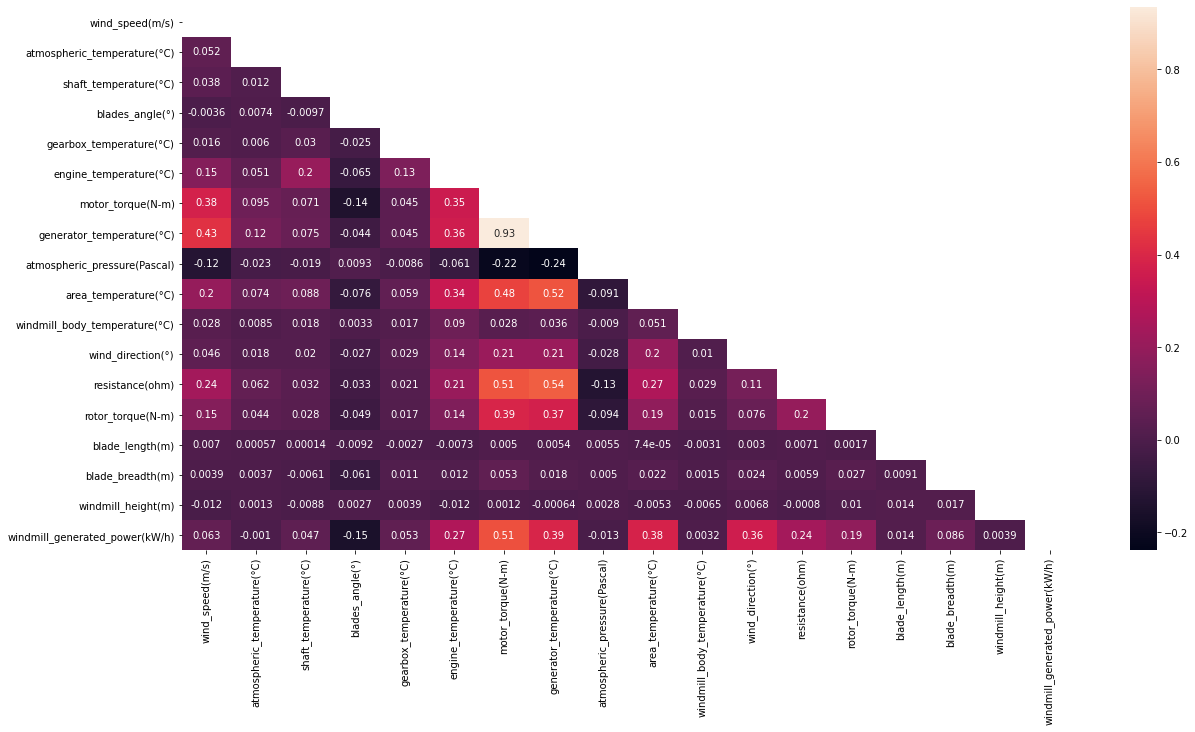

In [9]:
corr = train.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

**For the model to be stable enough, we drop highly correlated features. So, <br>
"motor_torque(N-m)" and "generator_temperature(°C)" are highly correlated, so will be dropped from both the dataset.**

In [10]:
train.drop(['generator_temperature(°C)','windmill_body_temperature(°C)'],inplace=True,axis=1)
test.drop(['generator_temperature(°C)','windmill_body_temperature(°C)'],inplace=True,axis=1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   atmospheric_pressure(Pascal)    25493 non-null  float64
 10  area_temperature(°C)            28200 non-null  float64
 11  wind_direction(°)               23097 non-null  float64
 12  resistance(ohm)                 

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tracking_id                   12086 non-null  object 
 1   datetime                      12086 non-null  object 
 2   wind_speed(m/s)               11960 non-null  float64
 3   atmospheric_temperature(°C)   10659 non-null  float64
 4   shaft_temperature(°C)         12085 non-null  float64
 5   blades_angle(°)               11980 non-null  float64
 6   gearbox_temperature(°C)       12085 non-null  float64
 7   engine_temperature(°C)        12081 non-null  float64
 8   motor_torque(N-m)             12075 non-null  float64
 9   atmospheric_pressure(Pascal)  10935 non-null  float64
 10  area_temperature(°C)          12085 non-null  float64
 11  wind_direction(°)             9926 non-null   float64
 12  resistance(ohm)               12086 non-null  float64
 13  r

**Checking Missing Values in the DataSet**

In [13]:
train.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [14]:
test.isnull().sum()

tracking_id                        0
datetime                           0
wind_speed(m/s)                  126
atmospheric_temperature(°C)     1427
shaft_temperature(°C)              1
blades_angle(°)                  106
gearbox_temperature(°C)            1
engine_temperature(°C)             5
motor_torque(N-m)                 11
atmospheric_pressure(Pascal)    1151
area_temperature(°C)               1
wind_direction(°)               2160
resistance(ohm)                    0
rotor_torque(N-m)                281
turbine_status                   797
cloud_level                      125
blade_length(m)                 2114
blade_breadth(m)                   0
windmill_height(m)               255
dtype: int64

<AxesSubplot:>

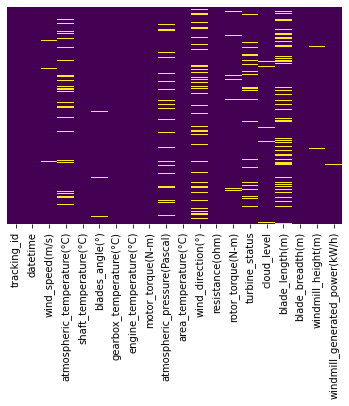

In [15]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

<AxesSubplot:>

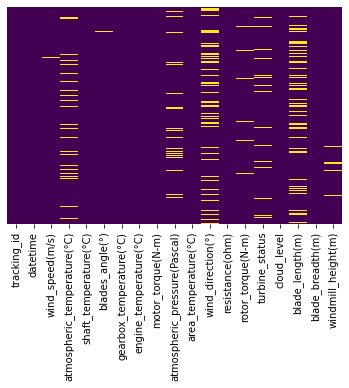

In [16]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

**Dealing with the Missing Values**

Replacing the missing values by the mean

In [17]:
train['gearbox_temperature(°C)'].fillna(train['gearbox_temperature(°C)'].mean(),inplace=True)
train['area_temperature(°C)'].fillna(train['area_temperature(°C)'].mean(),inplace=True)
train['rotor_torque(N-m)'].fillna(train['rotor_torque(N-m)'].mean(),inplace=True)
train['blade_length(m)'].fillna(train['blade_length(m)'].mean(),inplace=True)
train['blade_breadth(m)'].fillna(train['blade_breadth(m)'].mean(),inplace=True)
train['windmill_height(m)'].fillna(train['windmill_height(m)'].mean(),inplace=True)
train['cloud_level'].fillna(train['cloud_level'].mode()[0],inplace=True)
train['atmospheric_temperature(°C)'].fillna(train['atmospheric_temperature(°C)'].mean(),inplace=True)
train['atmospheric_pressure(Pascal)'].fillna(train['atmospheric_pressure(Pascal)'].mean(),inplace=True)
train['wind_speed(m/s)'].fillna(train['wind_speed(m/s)'].mean(),inplace=True)
train['shaft_temperature(°C)'].fillna(train['shaft_temperature(°C)'].mean(),inplace=True)
train['blades_angle(°)'].fillna(train['blades_angle(°)'].mean(),inplace=True)
train['engine_temperature(°C)'].fillna(train['engine_temperature(°C)'].mean(),inplace=True)
train['motor_torque(N-m)'].fillna(train['motor_torque(N-m)'].mean(),inplace=True)
train['wind_direction(°)'].fillna(train['wind_direction(°)'].mean(),inplace=True)

In [18]:
test['gearbox_temperature(°C)'].fillna(test['gearbox_temperature(°C)'].mean(),inplace=True)
test['area_temperature(°C)'].fillna(test['area_temperature(°C)'].mean(),inplace=True)
test['rotor_torque(N-m)'].fillna(test['rotor_torque(N-m)'].mean(),inplace=True)
test['blade_length(m)'].fillna(test['blade_length(m)'].mean(),inplace=True)
test['blade_breadth(m)'].fillna(test['blade_breadth(m)'].mean(),inplace=True)
test['windmill_height(m)'].fillna(test['windmill_height(m)'].mean(),inplace=True)
test['cloud_level'].fillna(test['cloud_level'].mode()[0],inplace=True)
test['atmospheric_temperature(°C)'].fillna(test['atmospheric_temperature(°C)'].mean(),inplace=True)
test['atmospheric_pressure(Pascal)'].fillna(test['atmospheric_pressure(Pascal)'].mean(),inplace=True)
test['wind_speed(m/s)'].fillna(test['wind_speed(m/s)'].mean(),inplace=True)
test['shaft_temperature(°C)'].fillna(test['shaft_temperature(°C)'].mean(),inplace=True)
test['blades_angle(°)'].fillna(test['blades_angle(°)'].mean(),inplace=True)
test['engine_temperature(°C)'].fillna(test['engine_temperature(°C)'].mean(),inplace=True)
test['motor_torque(N-m)'].fillna(test['motor_torque(N-m)'].mean(),inplace=True)
test['wind_direction(°)'].fillna(test['wind_direction(°)'].mean(),inplace=True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 28200 non-null  float64
 3   atmospheric_temperature(°C)     28200 non-null  float64
 4   shaft_temperature(°C)           28200 non-null  float64
 5   blades_angle(°)                 28200 non-null  float64
 6   gearbox_temperature(°C)         28200 non-null  float64
 7   engine_temperature(°C)          28200 non-null  float64
 8   motor_torque(N-m)               28200 non-null  float64
 9   atmospheric_pressure(Pascal)    28200 non-null  float64
 10  area_temperature(°C)            28200 non-null  float64
 11  wind_direction(°)               28200 non-null  float64
 12  resistance(ohm)                 

In [20]:
train.dropna(how='any',axis=0,inplace=True)
#test.dropna(how='any',axis=0,inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26245 entries, 0 to 28199
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     26245 non-null  object 
 1   datetime                        26245 non-null  object 
 2   wind_speed(m/s)                 26245 non-null  float64
 3   atmospheric_temperature(°C)     26245 non-null  float64
 4   shaft_temperature(°C)           26245 non-null  float64
 5   blades_angle(°)                 26245 non-null  float64
 6   gearbox_temperature(°C)         26245 non-null  float64
 7   engine_temperature(°C)          26245 non-null  float64
 8   motor_torque(N-m)               26245 non-null  float64
 9   atmospheric_pressure(Pascal)    26245 non-null  float64
 10  area_temperature(°C)            26245 non-null  float64
 11  wind_direction(°)               26245 non-null  float64
 12  resistance(ohm)                 

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tracking_id                   12086 non-null  object 
 1   datetime                      12086 non-null  object 
 2   wind_speed(m/s)               12086 non-null  float64
 3   atmospheric_temperature(°C)   12086 non-null  float64
 4   shaft_temperature(°C)         12086 non-null  float64
 5   blades_angle(°)               12086 non-null  float64
 6   gearbox_temperature(°C)       12086 non-null  float64
 7   engine_temperature(°C)        12086 non-null  float64
 8   motor_torque(N-m)             12086 non-null  float64
 9   atmospheric_pressure(Pascal)  12086 non-null  float64
 10  area_temperature(°C)          12086 non-null  float64
 11  wind_direction(°)             12086 non-null  float64
 12  resistance(ohm)               12086 non-null  float64
 13  r

**Since "turbine_status" and "cloud_level" are categorical,<br>
So, we use Dummy Variable encoding for "turbine_status" and ordinally encode the "cloud_level"**

In [23]:
train['cloud_level'].replace(['Extremely Low', 'Low', 'Medium'],[0, 1, 2],inplace=True)
test['cloud_level'].replace(['Extremely Low', 'Low', 'Medium'],[0, 1, 2],inplace=True)

In [24]:
train['turbine_status'].value_counts()

BB     1930
AAA    1925
BCB    1920
B2     1918
A      1914
D      1907
B      1870
ABC    1855
AB     1855
AC     1841
A2     1840
BA     1835
BD     1829
BBB    1806
Name: turbine_status, dtype: int64

In [25]:
dummy = ['turbine_status']
df_dummy = pd.get_dummies(train[dummy])
df_test_dummy = pd.get_dummies(test[dummy])

In [26]:
df_dummy

,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,0,0,0,0,0,0,0,0,0,1,0,0,0,0
28196,0,0,0,0,0,0,0,0,0,1,0,0,0,0
28197,0,0,0,0,0,0,0,0,0,0,0,0,0,1
28198,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
df_test_dummy

,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12082,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12083,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12084,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
train = pd.concat([train,df_dummy],axis=1)
test = pd.concat([test,df_test_dummy],axis=1)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26245 entries, 0 to 28199
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     26245 non-null  object 
 1   datetime                        26245 non-null  object 
 2   wind_speed(m/s)                 26245 non-null  float64
 3   atmospheric_temperature(°C)     26245 non-null  float64
 4   shaft_temperature(°C)           26245 non-null  float64
 5   blades_angle(°)                 26245 non-null  float64
 6   gearbox_temperature(°C)         26245 non-null  float64
 7   engine_temperature(°C)          26245 non-null  float64
 8   motor_torque(N-m)               26245 non-null  float64
 9   atmospheric_pressure(Pascal)    26245 non-null  float64
 10  area_temperature(°C)            26245 non-null  float64
 11  wind_direction(°)               26245 non-null  float64
 12  resistance(ohm)                 

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tracking_id                   12086 non-null  object 
 1   datetime                      12086 non-null  object 
 2   wind_speed(m/s)               12086 non-null  float64
 3   atmospheric_temperature(°C)   12086 non-null  float64
 4   shaft_temperature(°C)         12086 non-null  float64
 5   blades_angle(°)               12086 non-null  float64
 6   gearbox_temperature(°C)       12086 non-null  float64
 7   engine_temperature(°C)        12086 non-null  float64
 8   motor_torque(N-m)             12086 non-null  float64
 9   atmospheric_pressure(Pascal)  12086 non-null  float64
 10  area_temperature(°C)          12086 non-null  float64
 11  wind_direction(°)             12086 non-null  float64
 12  resistance(ohm)               12086 non-null  float64
 13  r

**Converting the feature "datetime" into pandas datetime format**

In [31]:
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

train['dmonth'] = train['datetime'].dt.month
train['dday'] = train['datetime'].dt.day
train['ddayofweek'] = train['datetime'].dt.dayofweek

test['dmonth'] = test['datetime'].dt.month
test['dday'] = test['datetime'].dt.day
test['ddayofweek'] = test['datetime'].dt.dayofweek

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26245 entries, 0 to 28199
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tracking_id                     26245 non-null  object        
 1   datetime                        26245 non-null  datetime64[ns]
 2   wind_speed(m/s)                 26245 non-null  float64       
 3   atmospheric_temperature(°C)     26245 non-null  float64       
 4   shaft_temperature(°C)           26245 non-null  float64       
 5   blades_angle(°)                 26245 non-null  float64       
 6   gearbox_temperature(°C)         26245 non-null  float64       
 7   engine_temperature(°C)          26245 non-null  float64       
 8   motor_torque(N-m)               26245 non-null  float64       
 9   atmospheric_pressure(Pascal)    26245 non-null  float64       
 10  area_temperature(°C)            26245 non-null  float64       
 11  wi

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tracking_id                   12086 non-null  object        
 1   datetime                      12086 non-null  datetime64[ns]
 2   wind_speed(m/s)               12086 non-null  float64       
 3   atmospheric_temperature(°C)   12086 non-null  float64       
 4   shaft_temperature(°C)         12086 non-null  float64       
 5   blades_angle(°)               12086 non-null  float64       
 6   gearbox_temperature(°C)       12086 non-null  float64       
 7   engine_temperature(°C)        12086 non-null  float64       
 8   motor_torque(N-m)             12086 non-null  float64       
 9   atmospheric_pressure(Pascal)  12086 non-null  float64       
 10  area_temperature(°C)          12086 non-null  float64       
 11  wind_direction(°)           

# Data Modelling

In [34]:
X = train.drop(['tracking_id','datetime','windmill_generated_power(kW/h)','turbine_status'],axis=1)
y = train['windmill_generated_power(kW/h)']

In [35]:
print(X.shape, y.shape)

(26245, 33) (26245,)


In [36]:
testData = test.drop(['tracking_id','datetime','turbine_status'],axis=1)

In [37]:
print(testData.shape)

(12086, 33)


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
testData = sc.transform(testData)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(20996, 33) (20996,)
(5249, 33) (5249,)


### Desicion Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
y_train_pred_dt = regressor_dt.predict(X_train)
y_test_pred_dt = regressor_dt.predict(X_test)

In [42]:
print(r2_score(y_true=y_train,y_pred=y_train_pred_dt))
print(r2_score(y_true=y_test,y_pred=y_test_pred_dt))

1.0
0.9003230730814837


### Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=200, n_jobs=1, oob_score=True, random_state=42)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=1, oob_score=True,
                      random_state=42)

In [44]:
y_train_pred_rf = regressor_rf.predict(X_train)
y_test_pred_rf = regressor_rf.predict(X_test)

In [45]:
print(r2_score(y_true=y_train,y_pred=y_train_pred_rf))
print(r2_score(y_true=y_test,y_pred=y_test_pred_rf))

0.9942525343903907
0.9560331608090455


### XGBoost Regression

In [46]:
from xgboost import XGBRegressor
regressor_xg = XGBRegressor(n_estimators=1000, max_depth=8, booster='gbtree', n_jobs=1, learning_rate=0.1, reg_lambda=0.01, reg_alpha=0.2)
regressor_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0.2, reg_lambda=0.01, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_train_pred_xg = regressor_xg.predict(X_train)
y_test_pred_xg = regressor_xg.predict(X_test)

In [48]:
print(r2_score(y_true=y_train,y_pred=y_train_pred_xg))
print(r2_score(y_true=y_test,y_pred=y_test_pred_xg))

0.9998335635787403
0.9568691748451127


# Testing the model on the test dataSet and creating the submission file

In [49]:
model = regressor_xg.predict(testData)

In [50]:
model

array([ 2.429122 ,  2.4174278,  3.421445 , ...,  5.151392 ,  5.612051 ,
       10.753198 ], dtype=float32)

In [51]:
model.shape

(12086,)

In [52]:
Ywrite=pd.DataFrame(model,columns=['windmill_generated_power(kW/h)'])
var =pd.DataFrame(test[['tracking_id','datetime']])
dataset_test_col = pd.concat([var,Ywrite], axis=1)
dataset_test_col.to_csv("../output/Prediction.csv",index=False)